### 1. Determine que columnas poseen faltantes (NA o Nulos),

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:

def columnas_con_faltantes(datos):
    # Obtener las columnas con valores nulos
    columnas_faltantes = datos.columns[datos.isnull().any()].tolist()
    
    return columnas_faltantes

# Cargar los datos de ejemplo (reemplaza 'datos.csv' con el nombre de tu archivo)
datos = pd.read_csv('train.csv')

# Obtener las columnas con valores faltantes
columnas_faltantes = columnas_con_faltantes(datos)

# Imprimir las columnas con valores faltantes
print("Columnas con valores faltantes:")
for columna in columnas_faltantes:
    print(columna)


Columnas con valores faltantes:
total_bedrooms


### 2. Determine la proporción de faltantes para cada columna con faltantes, muestre una gráfica de barras.

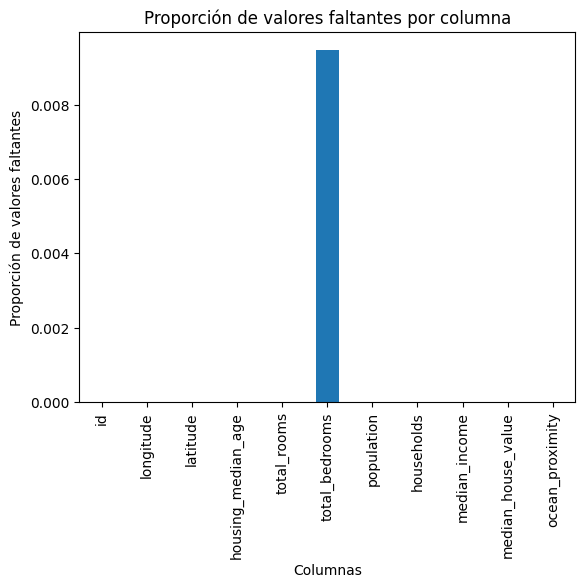

In [21]:
def proporcion_faltantes(datos):
    # Obtener la cantidad de valores faltantes en cada columna
    faltantes_por_columna = datos.isnull().sum()
    
    # Calcular la proporción de valores faltantes en cada columna
    proporciones = faltantes_por_columna / len(datos)
    
    return proporciones

# Obtener las proporciones de valores faltantes
proporciones_faltantes = proporcion_faltantes(datos)

# Crear la gráfica de barras
proporciones_faltantes.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Proporción de valores faltantes')
plt.title('Proporción de valores faltantes por columna')
plt.show()


### 3. Si la variable es numérica realice un análisis de cual sería el mejor método para realizar la imputación de datos, debe mostrar un bloque de código donde se muestre cada imputación y su análisis. Recuerde que puede ser:
#### a. Eliminar los faltantes, 
#### b. Imputación de media o mediana,
#### c. Valores arbitrarios (extremo derecho y extremo izquierdo),
#### d. Generación de números aleatorios en base a la distribución (no visto en clase).

In [22]:
def filtrar_columnas_numericas(datos):
    columnas_numericas = datos.select_dtypes(include=['float64', 'int64']).columns.tolist()
    datos_numericos = datos[columnas_numericas].copy()
    return datos_numericos

# Filtrar las columnas numéricas
datos_numericos = filtrar_columnas_numericas(datos)

# Imprimir el conjunto de datos con las variables numéricas
print("Conjunto de datos con variables numéricas:")
print(datos_numericos.head())


Conjunto de datos con variables numéricas:
      id  longitude  latitude  housing_median_age  total_rooms  \
0   9744    -121.65     36.77                  15         2191   
1  13893    -116.27     34.13                  37          452   
2  18277    -122.07     37.34                  35         1172   
3  16176    -122.39     37.74                  52          126   
4   8843    -118.38     34.09                  28         4001   

   total_bedrooms  population  households  median_income  median_house_value  
0           358.0        1150         330         4.7969            227500.0  
1           109.0         184          59         3.7292             65800.0  
2           184.0         512         175         7.3561            500001.0  
3            24.0          37          27        10.2264            225000.0  
4          1352.0        1799        1220         2.5784            272900.0  


In [23]:
def eliminar_faltantes(datos, columna):
    datos_sin_faltantes = datos.dropna(subset=[columna])
    return datos_sin_faltantes

def imputar_media(datos, columna):
    # Imputar valores faltantes con la media de la columna
    media = datos[columna].mean()
    datos_imputados = datos.copy()
    datos_imputados[columna].fillna(media, inplace=True)
    return datos_imputados

def imputar_mediana(datos, columna):
    # Imputar valores faltantes con la mediana de la columna
    mediana = datos[columna].median()
    datos_imputados = datos.copy()
    datos_imputados[columna].fillna(mediana, inplace=True)
    return datos_imputados

columnas_numericas = datos_numericos.columns

for columna in columnas_numericas:
    # Eliminar filas con valores faltantes
    datos_sin_faltantes = eliminar_faltantes(datos_numericos, columna)
    print(f"Datos sin faltantes en columna {columna}:")
    print(datos_sin_faltantes.head())

    # Imputar valores faltantes con la media de la columna
    datos_imputados_media = imputar_media(datos_numericos, columna)
    print(f"Datos imputados con media en columna {columna}:")
    print(datos_imputados_media.head())

    # Imputar valores faltantes con la mediana de la columna
    datos_imputados_mediana = imputar_mediana(datos_numericos, columna)
    print(f"Datos imputados con mediana en columna {columna}:")
    print(datos_imputados_mediana.head())


Datos sin faltantes en columna id:
      id  longitude  latitude  housing_median_age  total_rooms  \
0   9744    -121.65     36.77                  15         2191   
1  13893    -116.27     34.13                  37          452   
2  18277    -122.07     37.34                  35         1172   
3  16176    -122.39     37.74                  52          126   
4   8843    -118.38     34.09                  28         4001   

   total_bedrooms  population  households  median_income  median_house_value  
0           358.0        1150         330         4.7969            227500.0  
1           109.0         184          59         3.7292             65800.0  
2           184.0         512         175         7.3561            500001.0  
3            24.0          37          27        10.2264            225000.0  
4          1352.0        1799        1220         2.5784            272900.0  
Datos imputados con media en columna id:
      id  longitude  latitude  housing_median_age  to

In [25]:
def obtener_columnas_categoricas(datos):
    columnas_categoricas = datos.select_dtypes(include='object').columns
    return datos[columnas_categoricas]

df_categorico = obtener_columnas_categoricas(datos)

# Imprimir el nuevo DataFrame con las columnas categóricas
print("DataFrame con columnas categóricas:")
print(df_categorico.head())


DataFrame con columnas categóricas:
  ocean_proximity
0       <1H OCEAN
1          INLAND
2       <1H OCEAN
3        NEAR BAY
4       <1H OCEAN


In [27]:
def imputar_categorico(datos):
    datos_imputados = datos.copy()
    for columna in datos.columns:
        moda = datos[columna].mode().iloc[0]  # Obtener la moda
        datos_imputados[columna].fillna(moda, inplace=True)
    return datos_imputados

df_imputado = imputar_categorico(df_categorico)

# Imprimir el DataFrame con la imputación categórica
print("DataFrame imputado:")
print(df_imputado.head())


DataFrame imputado:
  ocean_proximity
0       <1H OCEAN
1          INLAND
2       <1H OCEAN
3        NEAR BAY
4       <1H OCEAN


### 5. Realice la codificación de variables categóricas, determine cual es le mejor enfoque para cada caso, recuerde que puede realizar los siguientes enfoques:
#### a. One Hote Encodign.
#### b. Codificación por Frecuencia.
#### c. Codificación por Densidad

In [28]:
def generar_one_hot_encoding(datos):
    df_encoded = pd.get_dummies(datos)
    return df_encoded

# Ejemplo de uso
# Supongamos que tienes un DataFrame llamado "df_imputado" y quieres generar One Hot Encoding
df_encoded = generar_one_hot_encoding(df_imputado)

# Imprimir el DataFrame con One Hot Encoding
print("DataFrame con One Hot Encoding:")
print(df_encoded.head())


DataFrame con One Hot Encoding:
   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          1                       0                       0   
1                          0                       1                       0   
2                          1                       0                       0   
3                          0                       0                       0   
4                          1                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         0                           0  
1                         0                           0  
2                         0                           0  
3                         1                           0  
4                         0                           0  


### 6. Para todas las variables resultantes realice Feature Scaling según lo considere más pertinente.

In [36]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
data_numericas = datos_numericos.select_dtypes(include=['float', 'int'])

# Perform feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numericas)
data_scaled = pd.DataFrame(data_scaled, columns=data_numericas.columns)

# Statistical description of scaled data
data_scaled.describe()


,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.431000e+04,1.444700e+04,1.444700e+04,1.444700e+04,1.444700e+04
mean,-5.803561e-17,4.942863e-17,3.024737e-16,1.377116e-17,-6.713441e-17,9.607968e-17,7.229860e-17,-5.926518e-17,-3.221468e-17,1.032837e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.724790e+00,-2.355735e+00,-1.452625e+00,-2.212627e+00,-1.188731e+00,-1.265995e+00,-1.262951e+00,-1.292484e+00,-1.777237e+00,-1.664713e+00
25%,-8.621810e-01,-1.110378e+00,-8.017092e-01,-8.617895e-01,-5.377766e-01,-5.725947e-01,-5.688125e-01,-5.700018e-01,-6.851026e-01,-7.571904e-01
50%,-1.098754e-02,5.392830e-01,-6.471751e-01,1.228189e-02,-2.321621e-01,-2.471211e-01,-2.333120e-01,-2.385403e-01,-1.737847e-01,-2.357601e-01
75%,8.684923e-01,7.788706e-01,9.730907e-01,6.479701e-01,2.267111e-01,2.575987e-01,2.641541e-01,2.703048e-01,4.537598e-01,5.008360e-01
max,1.739914e+00,2.630684e+00,2.953936e+00,1.839886e+00,1.656038e+01,1.393220e+01,2.415321e+01,1.445452e+01,5.883260e+00,2.543186e+00


### 7. Crear un modelo de regresión que permita minimizar el RMSE en predicción, para este inciso puede utilizar cualquier modelo de regresión que considere adecuado.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# dividir la data
X = datos_numericos.drop("median_income", axis=1)  # Independent variables
y = datos_numericos["median_house_value"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create the Linear Regression model
model = LinearRegression()

# Fit the model on the imputed training data
model.fit(X_train_imputed, y_train)

# Make predictions on the imputed testing data
y_pred = model.predict(X_test_imputed)

# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("RMSE:", rmse)



RMSE: 9.041088125135797e-11
